In [1]:
import matplotlib.pyplot as plt
import selenium
import undetected_chromedriver as uc
import re
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os                           
import matplotlib as mpl      
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sc
import csv
import seaborn as sns
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException


In [2]:
## Declaration of empty lists
price_list = []
Region_list = []
Type_list = []
Sqm_list = []
Year_of_const_list = []
Dist_from_sea_list = []
Dist_from_air_list = []
Region_Unseen_list = []
Type_Unseen_list = []
Sqm_Unseen_list = []
Year_of_const_Unseen_list = []
Dist_from_sea_Unseen_list = []
Dist_from_air_Unseen_list = []
price_Unseen_list = []
code_list = []

In [3]:
##Loads out lists from csv
with open('C:\data project\list_region.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Region_list = [row for row in csv_reader]
    
with open('C:\data project\price_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    price_list = [row for row in csv_reader]
    
with open('C:\data project\Type_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Type_list = [row for row in csv_reader]
    
with open('C:\data project\Sqm_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Sqm_list = [row for row in csv_reader]
    
with open('C:\data project\Year_of_const_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Year_of_const_list = [row for row in csv_reader]
    
with open('C:\data project\Dist_from_sea_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Dist_from_sea_list = [row for row in csv_reader]
    
with open('C:\data project\Dist_from_air_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Dist_from_air_list = [row for row in csv_reader]
    

##################LOADS UNSEED DATA TO LISTS#####################################################

with open('C:\data project\list_Unseen_region.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Region_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\price_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    price_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\Type_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Type_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\Sqm_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Sqm_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\Year_of_const_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Year_of_const_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\Dist_from_sea_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Dist_from_sea_Unseen_list = [row for row in csv_reader]
    
with open('C:\data project\Dist_from_air_Unseen_list.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    Dist_from_air_Unseen_list = [row for row in csv_reader]
    


In [4]:
## Removes the brackets from list to show in df.
price_list = [x[0] for x in price_list]
Sqm_list = [x[0] for x in Sqm_list]
Region_list = [x[0] for x in Region_list]
Year_of_const_list = [x[0] for x in Year_of_const_list]
Dist_from_sea_list = [x[0] for x in Dist_from_sea_list]
Dist_from_air_list = [x[0] for x in Dist_from_air_list]
Type_list = [x[0] for x in Type_list]
#######################Remove Brackets from Unseen############
Region_Unseen_list = [x[0] for x in Region_Unseen_list]
Type_Unseen_list = [x[0] for x in Type_Unseen_list]
Sqm_Unseen_list = [x[0] for x in Sqm_Unseen_list]
Year_of_const_Unseen_list = [x[0] for x in Year_of_const_Unseen_list]
Dist_from_sea_Unseen_list = [x[0] for x in Dist_from_sea_Unseen_list]
Dist_from_air_Unseen_list = [x[0] for x in Dist_from_air_Unseen_list]
price_Unseen_list = [x[0] for x in price_Unseen_list]

In [5]:
df = pd.DataFrame(zip(price_list,Sqm_list, Region_list,Year_of_const_list,Dist_from_sea_list,Dist_from_air_list,Type_list), columns=['Price', 'Sqm', 'Region', 'Year Of Construction', 'Dist From Sea in m', 'Dist From Air in km','Type'])
display(df) ##Run after loaded our lists

df_unseen = pd.DataFrame(zip(price_Unseen_list,Sqm_Unseen_list,Region_Unseen_list,Year_of_const_Unseen_list,Dist_from_sea_Unseen_list,Dist_from_air_Unseen_list,Type_Unseen_list),columns=['Price', 'Sqm', 'Region', 'Year Of Construction', 'Dist From Sea in m', 'Dist From Air in km','Type'])
display(df_unseen)

,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type
0,350000,159 m²,Thessaloniki,1962,100 m,15 km,Flat
1,235000,118 m²,Athens,1975,2400 m,26 km,Flat
2,137000,108 m²,Athens,2002,1400 m,46 km,Duplex
3,170000,160 m²,Olympic coast,1999,10000 m,110 km,Detached house
4,400000,800 m²,Western Peloponnese,No Const Land,Missing,Missing,Land
...,...,...,...,...,...,...,...
7737,280000,120 m²,Thessaloniki/suburbs,2007,10000 m,6 km,Flat
7738,260000,120 m²,Thessaloniki/suburbs,2007,10000 m,6 km,Flat
7739,260000,120 m²,Thessaloniki/suburbs,2007,10000 m,6 km,Flat
7740,240000,120 m²,Thessaloniki/suburbs,2007,10000 m,6 km,Flat


,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type
0,,Missing,Missing,No Const Land,Missing,Missing,Missing
1,,Missing,Missing,No Const Land,Missing,Missing,Missing
2,,Missing,Missing,No Const Land,Missing,Missing,Missing
3,,Missing,Missing,No Const Land,Missing,Missing,Missing
4,,Missing,Missing,No Const Land,Missing,Missing,Missing
...,...,...,...,...,...,...,...
1506,800,104 m²,Athens,No Const Land,16000 m,28 km,Flat
1507,800,185 m²,Athens,1985,19000 m,28000 km,Business
1508,350,33 m²,Athens,1989,14000 m,24 km,Business
1509,650,95 m²,Athens,1997,17000 m,23 km,Business


In [6]:
is_fixed = df[df.duplicated()]
print(is_fixed)
df.drop_duplicates(inplace=True) ## Remve duplicatses
df_unseen.drop_duplicates(inplace=True) ##Remove from unseed
is_fixed = df[df.duplicated()] ## Can print to check
print("################################################################################################")
print(is_fixed)

       Price      Sqm                Region Year Of Construction  \
15    350000   159 m²          Thessaloniki                 1962   
16    235000   118 m²                Athens                 1975   
17    137000   108 m²                Athens                 2002   
18    170000   160 m²         Olympic coast                 1999   
19    400000   800 m²   Western Peloponnese        No Const Land   
...      ...      ...                   ...                  ...   
7679          Missing               Missing        No Const Land   
7681          Missing               Missing        No Const Land   
7737  280000   120 m²  Thessaloniki/suburbs                 2007   
7739  260000   120 m²  Thessaloniki/suburbs                 2007   
7741  240000   120 m²  Thessaloniki/suburbs                 2007   

     Dist From Sea in m Dist From Air in km            Type  
15                100 m               15 km            Flat  
16               2400 m               26 km            Flat

In [7]:
mask = df.apply(lambda row: row.astype(str).str.contains('Missing').any(), axis=1) ##Drop Missing Values
df = df.drop(df[mask].index)
mask = df_unseen.apply(lambda row: row.astype(str).str.contains('Missing').any(), axis=1)
df_unseen = df_unseen.drop(df_unseen[mask].index)
df_without_land = df  ## Drop Land
mask = df.apply(lambda row: row.astype(str).str.contains('Land').any(), axis=1)
df_without_land = df_without_land.drop(df_without_land[mask].index) ## df without land creating
df_without_land = df_without_land[~(df_without_land == '').any(axis=1)] ## Drop the rows including ''
df_without_land['Sqm'] = df_without_land['Sqm'].str.replace(r'\s*m²$', '', regex = True)## Remove the m² sign
df_without_land['Dist From Sea in m'] = df_without_land['Dist From Sea in m'].str.replace(r'\s*m$', '', regex = True) ## Remove the m 
df_without_land['Dist From Air in km'] = df_without_land['Dist From Air in km'].str.replace(r'\s*km$', '', regex = True)## Remove Km
df_without_land['Price'] = pd.to_numeric(df_without_land['Price'], errors='coerce').fillna(0).astype(int) ##Price to int
df_without_land['Sqm'] = pd.to_numeric(df_without_land['Sqm'], errors='coerce').astype(int) ##Sqm to int
df_without_land['Dist From Sea in m'] = pd.to_numeric(df_without_land['Dist From Sea in m'], errors='coerce').astype(int) ## Dist Sea to int
df_without_land['Dist From Air in km'] = pd.to_numeric(df_without_land['Dist From Air in km'], errors='coerce').astype(int) ## Dist Air to int
df_without_land['Year Of Construction'] = pd.to_numeric(df_without_land['Year Of Construction'], errors='coerce').astype(int) ## Year To int

##############Same For UNSEEN################################################
mask = df_unseen.apply(lambda row: row.astype(str).str.contains('Land').any(), axis=1)
df_unseen = df_unseen.drop(df_unseen[mask].index) ## df without land creating
df_unseen = df_unseen[~(df_unseen == '').any(axis=1)] ## Drop the rows including ''
df_unseen['Sqm'] = df_unseen['Sqm'].str.replace(r'\s*m²$', '', regex = True)## Remove the m² sign
df_unseen['Dist From Sea in m'] = df_unseen['Dist From Sea in m'].str.replace(r'\s*m$', '', regex = True) ## Remove the m 
df_unseen['Dist From Air in km'] = df_unseen['Dist From Air in km'].str.replace(r'\s*km$', '', regex = True)## Remove Km
df_unseen['Price'] = pd.to_numeric(df_unseen['Price'], errors='coerce').fillna(0).astype(int) ##Price to int
df_unseen['Sqm'] = pd.to_numeric(df_unseen['Sqm'], errors='coerce').astype(int) ##Sqm to int
df_unseen['Dist From Sea in m'] = pd.to_numeric(df_unseen['Dist From Sea in m'], errors='coerce').astype(int) ## Dist Sea to int
df_unseen['Dist From Air in km'] = pd.to_numeric(df_unseen['Dist From Air in km'], errors='coerce').astype(int) ## Dist Air to int
df_unseen['Year Of Construction'] = pd.to_numeric(df_unseen['Year Of Construction'], errors='coerce').astype(int) ## Year To int
###############################################################################
display(df_without_land)
display(df_unseen)

,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type
0,350000,159,Thessaloniki,1962,100,15,Flat
1,235000,118,Athens,1975,2400,26,Flat
2,137000,108,Athens,2002,1400,46,Duplex
3,170000,160,Olympic coast,1999,10000,110,Detached house
6,142000,78,Athens,2006,1700,45,Flat
...,...,...,...,...,...,...,...
7734,290000,107,Crete,2012,80,16,Maisonette
7735,1500000,720,Thessaloniki/suburbs,2007,10000,6,Flat
7736,280000,120,Thessaloniki/suburbs,2007,10000,6,Flat
7738,260000,120,Thessaloniki/suburbs,2007,10000,6,Flat


,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type
11,175000,70,Athens,1968,6000,40,Flat
12,42000,51,Athens,71,10000,34,Flat
13,64000,70,Athens,1966,7000,34,Flat
14,165000,60,Athens,1962,9000,30,Flat
15,46000,50,Athens,1970,8000,38,Flat
...,...,...,...,...,...,...,...
1504,650,44,Athens,2009,18000,30,Business
1505,4000,400,Athens,1980,12000,31,Duplex
1507,800,185,Athens,1985,19000,28000,Business
1508,350,33,Athens,1989,14000,24,Business


In [8]:
mask = df_without_land['Type'].str.contains('Flat') ## mask to apply only flats
df_only_flat = df_without_land.loc[mask]
mask = df_unseen['Type'].str.contains('Flat') ## same for unseen
df_unseen_flat = df_unseen.loc[mask]
display(df_only_flat)

,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type
0,350000,159,Thessaloniki,1962,100,15,Flat
1,235000,118,Athens,1975,2400,26,Flat
6,142000,78,Athens,2006,1700,45,Flat
7,92000,66,Athens,2004,8000,37,Flat
12,216000,106,Athens,2007,10000,36,Flat
...,...,...,...,...,...,...,...
7727,210000,77,Athens,1959,3000,3,Flat
7735,1500000,720,Thessaloniki/suburbs,2007,10000,6,Flat
7736,280000,120,Thessaloniki/suburbs,2007,10000,6,Flat
7738,260000,120,Thessaloniki/suburbs,2007,10000,6,Flat


In [9]:
name_counts = df_only_flat['Region'].value_counts() ## Prints list that counts each Region by items in same count
print(name_counts)


Athens                  385
Thessaloniki            275
Limassol                163
Olympic coast            72
Crete                    59
Kassandra                47
Thessaloniki/suburbs     46
Chalkidiki/other         39
Corfu                    24
Sithonia                 19
Attica                   17
Paphos                   14
Loutraki                 11
Peloponnese               7
Euboea                    6
Larnaka                   6
Kavala                    4
Eastern Peloponnese       4
Athos                     3
Protaras                  3
Cyclades                  2
Central Greece            2
North Greece              2
Asprovalta                2
Nicosia                   2
Islands                   1
Western Peloponnese       1
Thrace                    1
Serres                    1
Xanthi                    1
Name: Region, dtype: int64


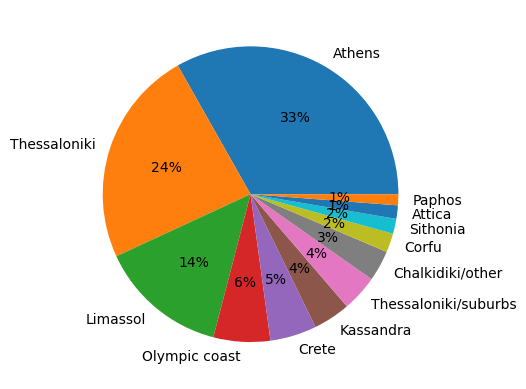

In [10]:
##Pie Chat of the most common 
name_counts = df_only_flat['Region'].value_counts()
labels = ["Athens","Thessaloniki","Limassol","Olympic coast","Crete","Kassandra","Thessaloniki/suburbs","Chalkidiki/other","Corfu","Sithonia","Attica","Paphos"]
sizes = name_counts[:12]
plt.pie(sizes, labels=labels,autopct='%1.0f%%')
plt.show()

In [11]:
athens_df = df_only_flat[df_only_flat['Region'].str.contains('Athens')]
athens_df = athens_df.loc[athens_df["Sqm"] <= 260] ## Dispose the lies
athens_df = athens_df.loc[athens_df["Dist From Sea in m"] <= 120000] ## Dispose the irrelevant
athens_df = athens_df.loc[athens_df["Dist From Air in km"] <= 5000] ## Dispose the irrelevant
df_unseen_flat = df_unseen_flat.loc[df_unseen_flat["Price"] >= 10000] ## Dispose Rent

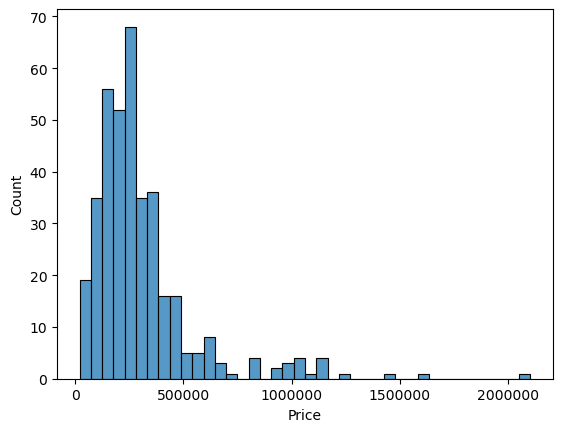

In [12]:
## Price Column distrebution 
sns.histplot(athens_df["Price"])  ## Histogram of the price column
plt.ticklabel_format(style='plain', axis='x')  ## Change to original values instead of 0.0 0.5 etc..
plt.show()

In [13]:
middle_price = int(athens_df["Price"].median())  ## Find the midean flat
middle_sqm =  int(athens_df["Sqm"].median())
middle_yoc = int(athens_df["Year Of Construction"].median())
middle_dfs = int(athens_df["Dist From Sea in m"].median())
middle_dfa = int(athens_df["Dist From Air in km"].median())
print("The middle price for a flat in Athenes is :", middle_price, "euro and goes by :", middle_sqm, "sqm","located ", middle_dfs, "m from the sea and ", middle_dfa, "km from the airport")

The middle price for a flat in Athenes is : 255000 euro and goes by : 89 sqm located  6000 m from the sea and  26 km from the airport


Correlation Coefficient: 0.3950542668448897


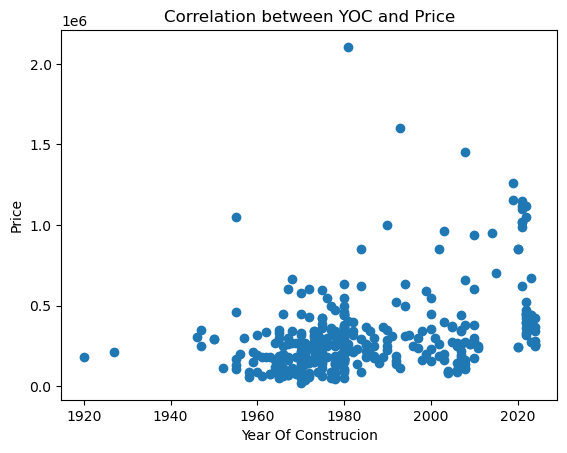

In [14]:
price = athens_df['Price'] ## Check corr_coef 
value = athens_df['Year Of Construction']

plt.scatter(value, price)
plt.xlabel('Year Of Construcion')
plt.ylabel('Price')
plt.title('Correlation between YOC and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)

plt.show()

Correlation Coefficient: 0.5635670642846141


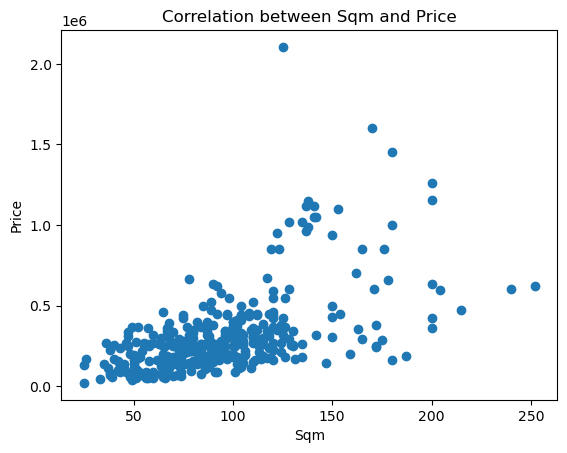

In [15]:
price = athens_df['Price']
value = athens_df['Sqm']

plt.scatter(value, price)
plt.xlabel('Sqm')
plt.ylabel('Price')
plt.title('Correlation between Sqm and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)

plt.show()

Correlation Coefficient: -0.27356181880820435


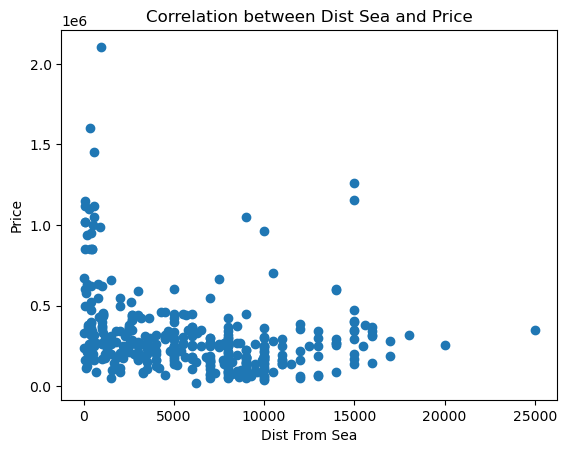

In [16]:
price = athens_df['Price']
value = athens_df['Dist From Sea in m']

plt.scatter(value, price)
plt.xlabel('Dist From Sea')
plt.ylabel('Price')
plt.title('Correlation between Dist Sea and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
## Sea Distance Grows price drops in weakly pattern
plt.show()

Correlation Coefficient: -0.05697633959530143


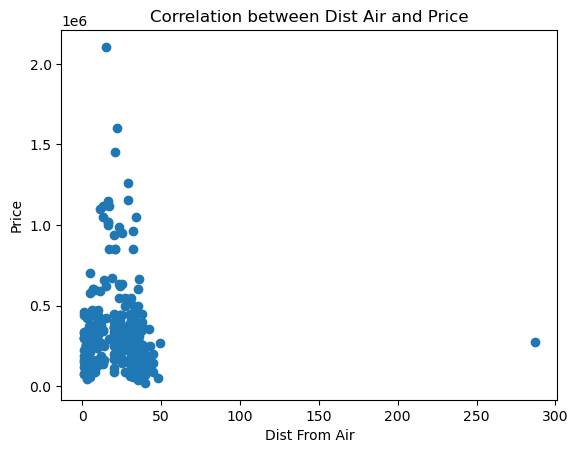

In [17]:
price = athens_df['Price']
value = athens_df['Dist From Air in km']

plt.scatter(value, price)
plt.xlabel('Dist From Air')
plt.ylabel('Price')
plt.title('Correlation between Dist Air and Price')

corr_coef = value.corr(price)

print('Correlation Coefficient:', corr_coef)
plt.show()

In [18]:
## By this research we can see very clearly by Cor Coef that the most price dragging values are the "Sqm" parameter and the "Year of construction"
## 1st place - Sqm
## 2nd place - Year Of Construction
## 3rd place - Distance from sea as negative value
## 4th Place - Distance from air


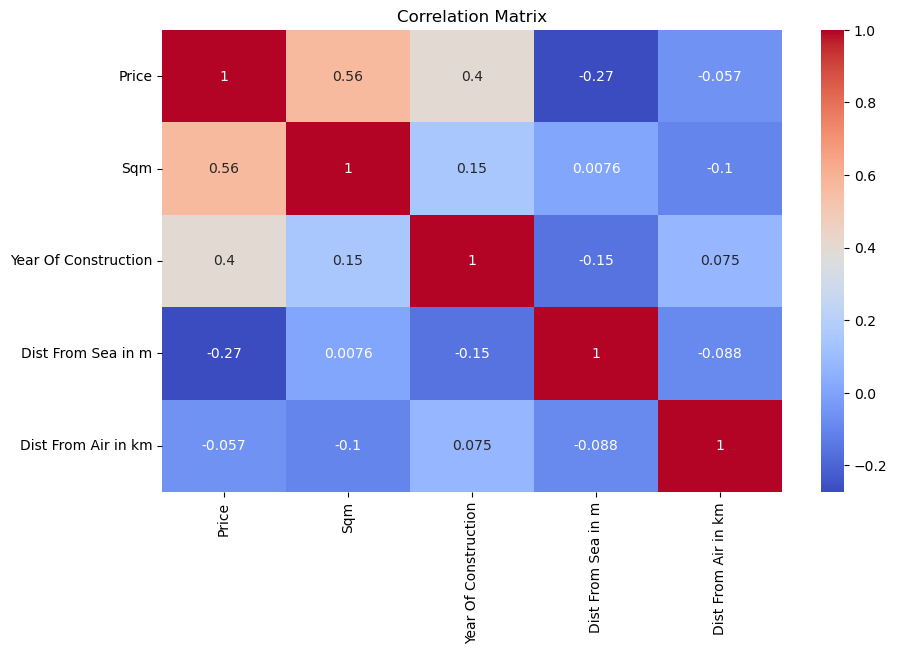

In [19]:
##In Summary Correlation matrix
correlation = athens_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
##Machine Learning using linear regression
X = athens_df[["Sqm", "Year Of Construction", "Dist From Sea in m","Dist From Air in km"]]
y = athens_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R^2 score:", score)
## making simple dataframe of midean values

new_data = {"Sqm": [middle_sqm], "Year Of Construction": [middle_yoc],
            "Dist From Sea in m": [middle_dfs], "Dist From Air in km": [middle_dfa]}

new_data_df = pd.DataFrame(new_data)
predictions = model.predict(new_data_df)

print("Predicted Price: ", int(predictions))

## The mistake is approx 20k eu which makes %8 out of 250k, we can live with that.


R^2 score: 0.4896368348287058
Predicted Price:  275024


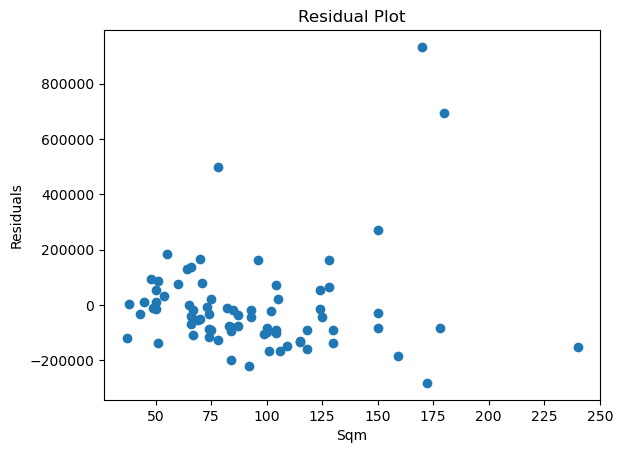

In [21]:
## Check the model by residual plot which shows residual betweeen predicted and actual values
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.scatter(X_test["Sqm"], residuals)
plt.title("Residual Plot")
plt.xlabel("Sqm")
plt.ylabel("Residuals")
plt.show()
## No clear pattern means that all the captured data has an influence

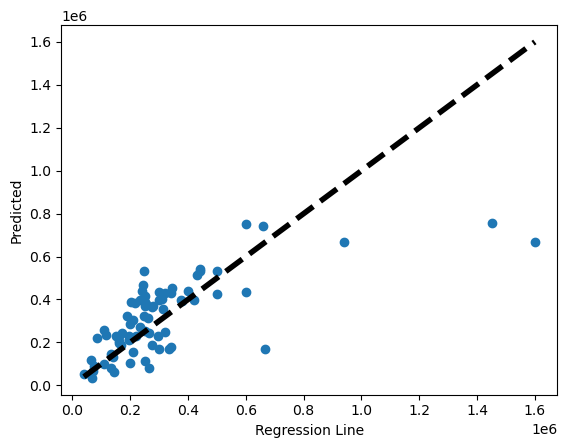

In [22]:
## Test model graph regression line where perfect prediction occur and the blue are the test predictions. 
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Regression Line')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
## By all the parameters I assume that my prediction model is good enaugh.

In [24]:
df_unseen_flat = df_unseen_flat.loc[df_unseen_flat["Year Of Construction"] >= 1900] #Dispose mistake
df_unseen_no_price = df_unseen_flat
df_unseen_no_price = df_unseen_no_price.drop('Price', axis=1)
df_unseen_no_price = df_unseen_no_price.drop('Type', axis =1)
df_unseen_no_price = df_unseen_no_price.drop('Region', axis =1)

In [25]:
predictions = model.predict(df_unseen_no_price)

In [26]:
predictions = predictions.astype(int)

In [27]:
test_df = df_unseen_flat
test_df["Machine Predictions"] = predictions
test_df["Difference"] = test_df["Price"] - test_df["Machine Predictions"]

In [28]:
display(test_df)

,Price,Sqm,Region,Year Of Construction,Dist From Sea in m,Dist From Air in km,Type,Machine Predictions,Difference
11,175000,70,Athens,1968,6000,40,Flat,156085,18915
13,64000,70,Athens,1966,7000,34,Flat,140093,-76093
14,165000,60,Athens,1962,9000,30,Flat,69535,95465
15,46000,50,Athens,1970,8000,38,Flat,74018,-28018
16,295000,84,Athens,1982,1400,24,Flat,323040,-28040
...,...,...,...,...,...,...,...,...,...
1425,355000,135,Athens,2000,1000,19,Flat,571236,-216236
1427,310000,121,Athens,2009,3000,2,Flat,545947,-235947
1436,670000,213,Athens,1988,30,32,Flat,788988,-118988
1437,370000,160,Athens,2009,4500,28,Flat,641462,-271462


In [29]:
## Conclusion:  
## Our model predicts good deals based on database and machine learning
## This model greatly fits for buy -> renovate -> sale -> buy tactics
## Besides it also can find a "rip off" deals, if the flat sales for more than it is expected
## it demands further investigation before buying.